This document will sum up all the code we used in our 545 project.

* Data import and modification

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [91]:
# import data from .csv
raw_data = pd.read_csv('SP500.csv').sort_values(by = 'Date', ascending = True)
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data['spread'] = (raw_data['High'] - raw_data['Low'])/raw_data['Low']
raw_data['opentoclose'] = (raw_data['Open'] - raw_data['Close'].shift(1))/raw_data['Close'].shift(1)
raw_data['return'] = raw_data['Close'].pct_change()
raw_data['ma5'] = raw_data['return'].rolling(window = 5).mean()
raw_data['ma10'] = raw_data['return'].rolling(window = 10).mean()
raw_data['std5'] = raw_data['return'].rolling(window = 5).std()

raw_data.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume,spread,opentoclose,return,ma5,ma10,std5
2979,2019-11-06,3075.100098,3078.340088,3065.889893,3076.780029,3076.780029,4458190000,0.004061,0.000156,0.000702,0.001972,0.002386,0.004967
2980,2019-11-07,3087.020020,3097.770020,3080.229980,3085.179932,3085.179932,4144640000,0.005694,0.003328,0.002730,0.003123,0.002467,0.004113
2981,2019-11-08,3081.250000,3093.090088,3073.580078,3093.080078,3093.080078,3499150000,0.006348,-0.001274,0.002561,0.001702,0.002315,0.001946
2982,2019-11-11,3080.330078,3088.330078,3075.820068,3087.010010,3087.010010,3035530000,0.004067,-0.004122,-0.001962,0.000569,0.001561,0.002130
2983,2019-11-12,3089.280029,3102.610107,3084.729980,3091.840088,3091.840088,3466010000,0.005796,0.000735,0.001565,0.001119,0.001801,0.001907
2984,2019-11-13,3084.179932,3098.060059,3078.800049,3094.040039,3094.040039,3509280000,0.006256,-0.002478,0.000712,0.001121,0.001546,0.001906
2985,2019-11-14,3090.750000,3098.199951,3083.260010,3096.629883,3096.629883,3276070000,0.004846,-0.001063,0.000837,0.000742,0.001932,0.001681
2986,2019-11-15,3107.919922,3120.459961,3104.600098,3120.459961,3120.459961,3335650000,0.005109,0.003646,0.007695,0.001769,0.001736,0.003573
2987,2019-11-18,3117.909912,3124.169922,3112.060059,3122.030029,3122.030029,3436690000,0.003891,-0.000817,0.000503,0.002262,0.001416,0.003063
2988,2019-11-19,3127.449951,3127.639893,3113.469971,3120.179932,3120.179932,3590070000,0.004551,0.001736,-0.000593,0.001831,0.001475,0.003327


In [34]:
raw_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'spread',
       'opentoclose', 'return', 'ma5', 'ma10', 'std5'],
      dtype='object')

In [35]:
variables = ['Volume', 'spread','opentoclose', 'ma5', 'ma10', 'std5']

In [67]:
# define a function that can sign labels to different return levels
def get_level(data1, name, number):
    data = pd.DataFrame(data1[name])
#     print(data.index)
    if number == 2:
        for i in data.index:
            if data.loc[i, name]*100 >= 0:
                data.loc[i, 'level'] = 1
            else:
                data.loc[i, 'level'] = -1
        return data
    elif number == 4:
        for i in data.index:
            if data.loc[i, name]*100 < -2:
                data.loc[i, 'level'] = -2
            elif data.loc[i, name]*100 < 0:
                data.loc[i, 'level'] = -1
            elif data.loc[i, name]*100 < 2:
                data.loc[i, 'level'] = 1
            else:
                data.loc[i, 'level'] = 2
        return data
    else:
        raise ValueError('Input number should be 2 or 4!')

In [37]:
# get_level(raw_data, 'return', 4)

In [63]:
# define a function that aggregate previous dates data
def get_previous_data(data1, number, variables):
    data = data1.copy()
    new_variables = variables.copy()
    for variable in variables:
        for i in range(1, number):
            new_name = variable + '_sft_' + str(i)
            new_variables.append(new_name)
            data[new_name] = data[variable].shift(i)
            
    return data,new_variables

now we do KNN classification:

1) Naive KNN

In [169]:
spliting_date = pd.to_datetime('20190101')
knn_train_accuracy = []
knn_test_accuracy = []

for n in range(1,11):
    knn_data, new_variables = get_previous_data(raw_data, n, variables)
    knn_data['response'] = get_level(knn_data, 'return', 4)['level'].shift(-1)
    knn_data = knn_data.dropna(axis = 0, how = 'any').reset_index(drop = True)
    
    train = knn_data[knn_data['Date'] < spliting_date]
    train_x = train[new_variables]
    train_y = train['response']
    test = knn_data[knn_data['Date'] >= spliting_date]
    test_x = test[new_variables]
    test_y = test['response']
    
#     print(-1 in list(test_y))
    
    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    
    knn_train_ks = []
    knn_test_ks = []
    
    for k in range(40, 71):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(train_x, train_y)

        knn_train_pred = classifier.predict(train_x)
        knn_test_pred = classifier.predict(test_x)
        
        knn_train_ks.append(np.mean(knn_train_pred == train_y))
        knn_test_ks.append(np.mean(knn_test_pred == test_y))
    
    knn_train_accuracy.append(knn_train_ks)
    knn_test_accuracy.append(knn_test_ks)
    
#     print(n)
    
knn_train_accuracy = np.array(knn_train_accuracy).T
knn_test_accuracy = np.array(knn_test_accuracy).T

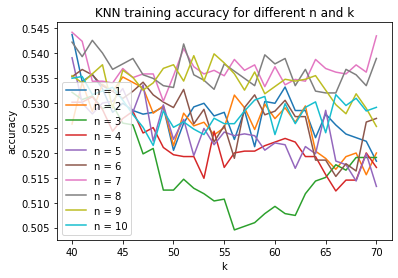

In [170]:
plt.plot([k for k in range(40,71)], knn_train_accuracy)
plt.legend(['n = ' + str(n) for n in range(1,11)])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('KNN training accuracy for different n and k')
plt.savefig('/Users/David/Desktop/KNN_train_accuracy.png')
plt.show()

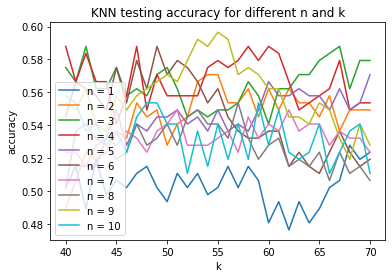

In [171]:
plt.plot([k for k in range(40,71)], knn_test_accuracy)
plt.legend(['n = ' + str(n) for n in range(1,11)])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('KNN testing accuracy for different n and k')
plt.savefig('/Users/David/Desktop/KNN_test_accuracy.png')
plt.show()

In [172]:
knn_data, new_variables = get_previous_data(raw_data, 5, variables)
knn_data['response'] = get_level(knn_data, 'return', 4)['level'].shift(-1)
knn_data = knn_data.dropna(axis = 0, how = 'any').reset_index(drop = True)

train = knn_data[knn_data['Date'] < spliting_date]
train_x = train[new_variables]
train_y = train['response']
test = knn_data[knn_data['Date'] >= spliting_date]
test_x = test[new_variables]
test_y = test['response']

#     print(-1 in list(test_y))

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)


classifier = KNeighborsClassifier(n_neighbors=55)
classifier.fit(train_x, train_y)

# knn_train_pred = classifier.predict(train_x)
knn_test_pred = classifier.predict(test_x)
confusion_matrix(test_y, knn_test_pred)

array([[  0,   0,   5,   0],
       [  0,  28,  64,   0],
       [  0,  34, 100,   0],
       [  0,   1,   1,   0]])

2) CV KNN

We run Cross Validation for optimal k, even though from the above figure we can see that this might not be of great help:

We choose $n = 5$, i.e., use 5 days of data as input.

In [122]:
spliting_date = pd.to_datetime('20190101')
knn_cv_accuracy = []


knn_data, new_variables = get_previous_data(raw_data, 5, variables)
knn_data['response'] = get_level(knn_data, 'return', 4)['level'].shift(-1)
knn_data = knn_data.dropna(axis = 0, how = 'any').reset_index(drop = True)

train = knn_data[knn_data['Date'] < spliting_date]
train_x = train[new_variables]
train_y = train['response']
test = knn_data[knn_data['Date'] >= spliting_date]
test_x = test[new_variables]
test_y = test['response']

#     print(-1 in list(test_y))

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)


for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(classifier,train_x, train_y, cv=10, scoring='accuracy')
    
    knn_cv_accuracy.append(scores.mean())
#     print(k)

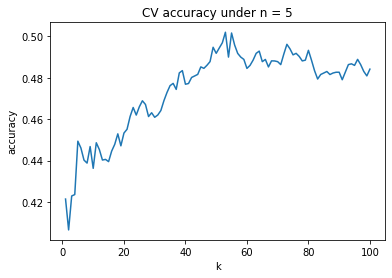

In [168]:
plt.plot([k for k in range(1,101)], knn_cv_accuracy)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('CV accuracy under n = 5')
plt.savefig('/Users/David/Desktop/KNN_CV_accuracy.png')
plt.show()

We can see that vanilla KNN method can not effectively distinguish between different patterns, thus we try polynomial embedding in KNN to see if we can improve our result.

In [173]:
spliting_date = pd.to_datetime('20190101')
knn_train_accuracy = []
knn_test_accuracy = []
poly = PolynomialFeatures(degree=2)

for n in range(1,6):
    knn_data, new_variables = get_previous_data(raw_data, n, variables)
    knn_data['response'] = get_level(knn_data, 'return', 4)['level'].shift(-1)
    knn_data = knn_data.dropna(axis = 0, how = 'any').reset_index(drop = True)
    
    # alse include poly of variables
    train = knn_data[knn_data['Date'] < spliting_date]
    train_x = poly.fit_transform(train[new_variables])
    train_y = train['response']
    test = knn_data[knn_data['Date'] >= spliting_date]
    test_x = poly.fit_transform(test[new_variables])
    test_y = test['response']
    
#     print(-1 in list(test_y))
    
    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    
    knn_train_ks = []
    knn_test_ks = []
    
    for k in range(40, 71):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(train_x, train_y)

        knn_train_pred = classifier.predict(train_x)
        knn_test_pred = classifier.predict(test_x)
        
        knn_train_ks.append(np.mean(knn_train_pred == train_y))
        knn_test_ks.append(np.mean(knn_test_pred == test_y))
    
    knn_train_accuracy.append(knn_train_ks)
    knn_test_accuracy.append(knn_test_ks)
    
    print(n)
    
knn_train_accuracy = np.array(knn_train_accuracy).T
knn_test_accuracy = np.array(knn_test_accuracy).T

1
2
3
4
5


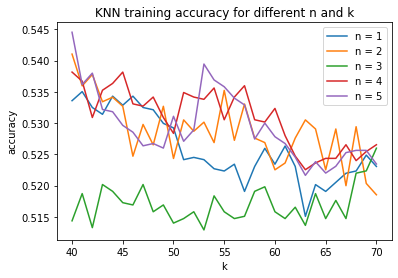

In [174]:
plt.plot([k for k in range(40,71)], knn_train_accuracy)
plt.legend(['n = ' + str(n) for n in range(1,11)])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('KNN training accuracy for different n and k')
plt.savefig('/Users/David/Desktop/KNNp_train_accuracy.png')
plt.show()

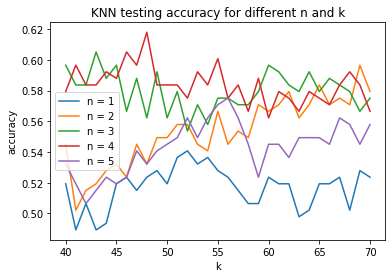

In [175]:
plt.plot([k for k in range(40,71)], knn_test_accuracy)
plt.legend(['n = ' + str(n) for n in range(1,11)])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('KNN testing accuracy for different n and k')
plt.savefig('/Users/David/Desktop/KNNp_test_accuracy.png')
plt.show()

In [135]:
classifier = KNeighborsClassifier(n_neighbors=35)
classifier.fit(train_x, train_y)

# knn_train_pred = classifier.predict(train_x)
knn_test_pred = classifier.predict(test_x)
confusion_matrix(test_y, knn_test_pred)

array([[ 0,  0,  5,  0],
       [ 0, 28, 64,  0],
       [ 0, 37, 97,  0],
       [ 0,  0,  2,  0]])

We compare the above figures and can see that: even though ploynomial embedding (degree = 2) can slightly increase accuracy for testing data, the improvement is very limited. Thus we decide not to stick with KNN model in the case.

* Logistic Regression

We then try logistic regression:

In [177]:
spliting_date = pd.to_datetime('20190101')
logistic_train_accuracy = []
logistic_test_accuracy = []

for n in range(1,11):
    log_data, new_variables = get_previous_data(raw_data, n, variables)
    log_data['response'] = get_level(log_data, 'return', 4)['level'].shift(-1)
    log_data = log_data.dropna(axis = 0, how = 'any').reset_index(drop = True)
    
    train = log_data[log_data['Date'] < spliting_date]
    train_x = train[new_variables]
    train_y = train['response']
    test = log_data[log_data['Date'] >= spliting_date]
    test_x = test[new_variables]
    test_y = test['response']
    
#     print(-1 in list(test_y))
    log_model = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial')
    log_model.fit(train_x, train_y)
    
    log_train_pred = log_model.predict(train_x)
    log_test_pred = log_model.predict(test_x)

    logistic_train_accuracy.append(np.mean(log_train_pred == train_y))
    logistic_test_accuracy.append(np.mean(log_test_pred == test_y))
    print(n)

1
2
3
4
5
6
7
8
9
10


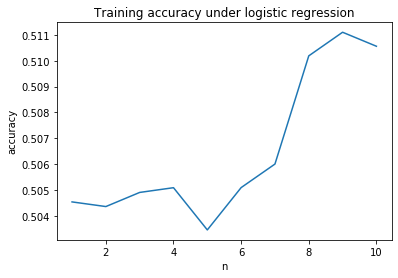

In [178]:
plt.plot([n for n in range(1,11)], logistic_train_accuracy)
plt.xlabel('n')
plt.ylabel('accuracy')
plt.title('Training accuracy under logistic regression')
plt.savefig('/Users/David/Desktop/log_train_accuracy.png')
plt.show()

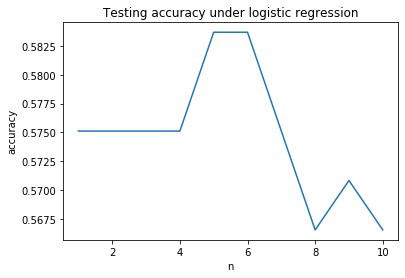

In [179]:
plt.plot([n for n in range(1,11)], logistic_test_accuracy)
plt.xlabel('n')
plt.ylabel('accuracy')
plt.title('Testing accuracy under logistic regression')
plt.savefig('/Users/David/Desktop/log_test_accuracy.png')
plt.show()

In [180]:
np.max(logistic_test_accuracy)

0.5836909871244635

In [181]:
np.argmax(logistic_test_accuracy) + 1

5

We can see that even the highest only has an accuracy of $58.4\%$

In [153]:
log_data, new_variables = get_previous_data(raw_data, 5, variables)
log_data['response'] = get_level(log_data, 'return', 4)['level'].shift(-1)
log_data = log_data.dropna(axis = 0, how = 'any').reset_index(drop = True)

train = log_data[log_data['Date'] < spliting_date]
train_x = train[new_variables]
train_y = train['response']
test = log_data[log_data['Date'] >= spliting_date]
test_x = test[new_variables]
test_y = test['response']

#     print(-1 in list(test_y))
log_model = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial')
log_model.fit(train_x, train_y)

log_test_pred = log_model.predict(test_x)

confusion_matrix(test_y, log_test_pred)

array([[  0,   0,   5,   0],
       [  0,   2,  90,   0],
       [  0,   0, 134,   0],
       [  0,   0,   2,   0]])

Also, it does not handle extreme case properly.

We now try polynomial implementatin in our logistic regression.

In [158]:
spliting_date = pd.to_datetime('20190101')
logistic_train_accuracy = []
logistic_test_accuracy = []

for n in range(1,6):
    log_data, new_variables = get_previous_data(raw_data, n, variables)
    log_data['response'] = get_level(log_data, 'return', 4)['level'].shift(-1)
    log_data = log_data.dropna(axis = 0, how = 'any').reset_index(drop = True)
    
    train = log_data[log_data['Date'] < spliting_date]
    train_x = train[new_variables]
    train_y = train['response']
    test = log_data[log_data['Date'] >= spliting_date]
    test_x = test[new_variables]
    test_y = test['response']
    
    logistic_train_p = []
    logistic_test_p = []
    for p in range(1,4):
        poly = PolynomialFeatures(degree=p)
        train_x_p = poly.fit_transform(train_x)
        test_x_p = poly.fit_transform(test_x)
        
        log_model = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial', penalty = 'none')
        log_model.fit(train_x_p, train_y)

        log_train_pred = log_model.predict(train_x_p)
        log_test_pred = log_model.predict(test_x_p)

        logistic_train_p.append(np.mean(log_train_pred == train_y))
        logistic_test_p.append(np.mean(log_test_pred == test_y))
    
    
    logistic_train_accuracy.append(logistic_train_p)
    logistic_test_accuracy.append(logistic_test_p)
    print(n)
    
logistic_train_accuracy = np.array(logistic_train_accuracy)
logistic_test_accuracy = np.array(logistic_test_accuracy)

1


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


2


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


3


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


4


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


5


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


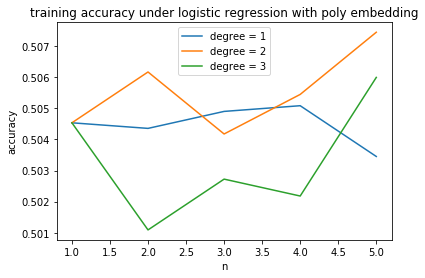

In [161]:
plt.plot([n for n in range(1,6)], logistic_train_accuracy)
plt.legend(['degree = ' + str(i) for i in range(1, 4)])
plt.xlabel('n')
plt.ylabel('accuracy')
plt.title('training accuracy under logistic regression with poly embedding')
plt.show()

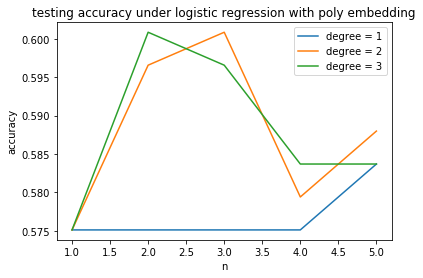

In [162]:
plt.plot([n for n in range(1,6)], logistic_test_accuracy)
plt.legend(['degree = ' + str(i) for i in range(1, 4)])
plt.xlabel('n')
plt.ylabel('accuracy')
plt.title('testing accuracy under logistic regression with poly embedding')
plt.show()

Logistic regression has a convergence problem in our case, and even if we take the finitely iterated results, we have a poor classification accuracy.